In [1]:
import xarray as xr
import gcsfs
from glob import glob
from tqdm import tqdm
from dask.diagnostics import ProgressBar, Profiler
import dask
import os
import shutil
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from IPython.display import clear_output
import random

from xbatcher import BatchGenerator

/srv/conda/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


ModuleNotFoundError: No module named 'xbatcher'

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
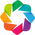

In [50]:
import holoviews as hv
from holoviews import opts
from holoviews.operation.datashader import datashade, shade, dynspread, rasterize
import datashader as ds
hv.extension('bokeh','matplotlib')

In [3]:
import keras
import tensorflow as tf

Using TensorFlow backend.


In [4]:
import intake
cat_url = 'https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/master.yaml'
cat = intake.Catalog(cat_url)
cat.walk(depth=1)

/srv/conda/lib/python3.6/site-packages/intake_esm/config.py:182: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  dot_file_settings = yaml.load(f)


{'ocean': <Catalog Entry: ocean>,
 'atmosphere': <Catalog Entry: atmosphere>,
 'hydro': <Catalog Entry: hydro>,
 'cmip6': <Catalog Entry: cmip6>}

In [5]:
ds = cat['ocean.CESM_POP_hires_control'].to_dask()
ds

<xarray.Dataset>
Dimensions:             (nlat: 2400, nlon: 3600, time: 14965, z_t: 62, z_t_150m: 15, z_w: 62, z_w_bot: 62, z_w_top: 62)
Coordinates:
    ANGLE               (nlat, nlon) float64 dask.array<shape=(2400, 3600), chunksize=(2400, 3600)>
    ANGLET              (nlat, nlon) float64 dask.array<shape=(2400, 3600), chunksize=(2400, 3600)>
    DXT                 (nlat, nlon) float64 dask.array<shape=(2400, 3600), chunksize=(2400, 3600)>
    DXU                 (nlat, nlon) float64 dask.array<shape=(2400, 3600), chunksize=(2400, 3600)>
    DYT                 (nlat, nlon) float64 dask.array<shape=(2400, 3600), chunksize=(2400, 3600)>
    DYU                 (nlat, nlon) float64 dask.array<shape=(2400, 3600), chunksize=(2400, 3600)>
    HT                  (nlat, nlon) float64 dask.array<shape=(2400, 3600), chunksize=(2400, 3600)>
    HTE                 (nlat, nlon) float64 dask.array<shape=(2400, 3600), chunksize=(2400, 3600)>
    HTN                 (nlat, nlon) float64 dask.

In [6]:
ds=ds.rename({'U1_1':'U', 'V1_1':'V', 'TAUX_2':'TAUX', 'TAUY_2':'TAUY', 'SSH_2':'SSH', 'ULONG':'XU', 'ULAT':'YU'})
ds

<xarray.Dataset>
Dimensions:             (nlat: 2400, nlon: 3600, time: 14965, z_t: 62, z_t_150m: 15, z_w: 62, z_w_bot: 62, z_w_top: 62)
Coordinates:
    ANGLE               (nlat, nlon) float64 dask.array<shape=(2400, 3600), chunksize=(2400, 3600)>
    ANGLET              (nlat, nlon) float64 dask.array<shape=(2400, 3600), chunksize=(2400, 3600)>
    DXT                 (nlat, nlon) float64 dask.array<shape=(2400, 3600), chunksize=(2400, 3600)>
    DXU                 (nlat, nlon) float64 dask.array<shape=(2400, 3600), chunksize=(2400, 3600)>
    DYT                 (nlat, nlon) float64 dask.array<shape=(2400, 3600), chunksize=(2400, 3600)>
    DYU                 (nlat, nlon) float64 dask.array<shape=(2400, 3600), chunksize=(2400, 3600)>
    HT                  (nlat, nlon) float64 dask.array<shape=(2400, 3600), chunksize=(2400, 3600)>
    HTE                 (nlat, nlon) float64 dask.array<shape=(2400, 3600), chunksize=(2400, 3600)>
    HTN                 (nlat, nlon) float64 dask.

In [7]:
def make_3d_coords(lon,lat):
    X = np.sin(np.radians(lat))
    Y = np.sin(np.radians(lon))*np.cos(np.radians(lat))
    Z = -np.cos(np.radians(lon))*np.cos(np.radians(lat))
    return (X,Y,Z)

# use dask and do this 
X, Y, Z = make_3d_coords(ds.XU.data, ds.YU.data)
ds['X'] = ds.XU.dims, X
ds['Y'] = ds.XU.dims, Y
ds['Z'] = ds.XU.dims, Z
ds

<xarray.Dataset>
Dimensions:             (nlat: 2400, nlon: 3600, time: 14965, z_t: 62, z_t_150m: 15, z_w: 62, z_w_bot: 62, z_w_top: 62)
Coordinates:
    ANGLE               (nlat, nlon) float64 dask.array<shape=(2400, 3600), chunksize=(2400, 3600)>
    ANGLET              (nlat, nlon) float64 dask.array<shape=(2400, 3600), chunksize=(2400, 3600)>
    DXT                 (nlat, nlon) float64 dask.array<shape=(2400, 3600), chunksize=(2400, 3600)>
    DXU                 (nlat, nlon) float64 dask.array<shape=(2400, 3600), chunksize=(2400, 3600)>
    DYT                 (nlat, nlon) float64 dask.array<shape=(2400, 3600), chunksize=(2400, 3600)>
    DYU                 (nlat, nlon) float64 dask.array<shape=(2400, 3600), chunksize=(2400, 3600)>
    HT                  (nlat, nlon) float64 dask.array<shape=(2400, 3600), chunksize=(2400, 3600)>
    HTE                 (nlat, nlon) float64 dask.array<shape=(2400, 3600), chunksize=(2400, 3600)>
    HTN                 (nlat, nlon) float64 dask.

In [20]:
def shift_variables(ds, shift_vars, corner_points=True):
    # needed to deal with xbatcher weirdness
    if 'nlon_input' in ds:
        xdim = 'nlon_input'
    else:
        xdim = 'nlon'
    if 'nlat_input' in ds:
        ydim = 'nlat_input'
    else:
        ydim = 'nlat'  
        
    ds = ds.copy()
    shift_vars = ['SSH', 'X', 'Y', 'Z']

    shifts = {'_e': {xdim: -1},
              '_w': {xdim: 1},
             '_n': {ydim: -1},
             '_s': {ydim: 1}}
    if corner_points:
        shifts.update({
             '_ne': {xdim: -1, ydim: -1},
             '_nw': {xdim: 1, ydim: -1},
             '_se': {xdim: -1, ydim: 1},
             '_sw': {xdim: 1, ydim: 1}})

    for var in shift_vars:
        for suf, shift in shifts.items():
            ds[var + suf] = ds[var].shift(**shift)
    return ds

In [9]:
# read https://anandology.com/blog/using-iterators-and-generators/
def dask_single_threaded(func):
    
    def func_single_threaded(*args, **kwargs):
        with dask.config.set(scheduler='single-threaded'):
            func(*args, **kwargs)
    
    return func_single_threaded

In [33]:
target_cols=['U','V']
feature_cols = ['X', 'Y', 'Z',
                'X_e','X_w','X_n','X_s','X_ne','X_se','X_nw','X_sw',
                'Y_e','Y_w','Y_n','Y_s','Y_ne','Y_se','Y_nw','Y_sw',
                'Z_e','Z_w','Z_n','Z_s','Z_ne','Z_se','Z_nw','Z_sw',
                'TAUX','TAUY','SST','SSH',
                'SSH_e','SSH_w','SSH_n','SSH_s','SSH_ne','SSH_se','SSH_nw','SSH_sw']
coord_cols = ['XU', 'YU']

def transform_batch(batch_ds, return_coords=False):
    batch_w_shift = shift_variables(batch_ds, ['X', 'Y', 'Z', 'SSH'])
    # convert to dataframe
    # ~15 s
    # the slow part is the dataframe conversion, where you have to call
    # "stack". There is no real way around this. I tried implementing
    # it in numpy, which was a bit faster, but then we can't call
    # .dropna in the next step
    if 'sample' in batch_w_shift:
        batch_w_shift = batch_w_shift.drop('sample')
    df = batch_w_shift.to_dataframe().reset_index(drop=True)
    # ~2 s
    df_dropped = df.dropna()

    X = df_dropped.loc[:, feature_cols].values
    y = df_dropped.loc[:, target_cols].values
    
    if return_coords:
        coords = df_dropped.loc[:, coord_cols].values
        return X, y, coords
    else:
        return X, y


default_variables = ['X', 'Y', 'Z', 'U', 'V', 'TAUX','TAUY','SST','SSH']

def data_generator(ds, iselector={}, sub_batch_size=100, variables=default_variables,
                   return_coords=False):

    bg = BatchGenerator(ds.isel(**iselector).reset_coords()[variables],
                        batch_dims={'time': 1},
                        #input_dims={'nlon': 100, 'nlat': 100}, ,
                        #input_overlap={'nlon' : 1, 'nlat' : 1},
                        concat_input_dims=True, preload_batch=True)
    
    # takes about 4 seconds to load batch
    with dask.config.set(scheduler='single-threaded'):
        for batch in bg:
            print('\n*** Loaded new Batch ***\n')
            print(batch)

            bt = transform_batch(batch, return_coords=return_coords)    
            X, y = bt[0], bt[1]
            if return_coords:
                coords = (bt[2],)
            else:
                coords = ()
            print(f'X.shape, y.shape: {X.shape}, {y.shape}')
        
            if sub_batch_size:
                n_samples = X.shape[0]
                n_start = np.arange(0, n_samples, sub_batch_size)
                np.random.shuffle(n_start)
                for i in n_start:
                    imax = min(i + sub_batch_size, n_samples)
                    yield (X[i:imax], y[i:imax]) + coords
            else:
                yield (X, y) + coords

In [28]:
ds0 = ds.isel(time=11).reset_coords()[default_variables + ['XU', 'YU']].load()
print(ds0)

In [31]:
ds0

<xarray.Dataset>
Dimensions:  (nlat: 2400, nlon: 3600)
Dimensions without coordinates: nlat, nlon
Data variables:
    X        (nlat, nlon) float64 -0.01745 -0.01745 ... -0.01745 -0.01745
    Y        (nlat, nlon) float64 -0.01745 -0.01745 ... -0.01745 -0.01745
    Z        (nlat, nlon) float64 -0.9997 -0.9997 -0.9997 ... -0.9997 -0.9997
    U        (nlat, nlon) float32 nan nan nan nan nan ... nan nan nan nan nan
    V        (nlat, nlon) float32 nan nan nan nan nan ... nan nan nan nan nan
    TAUX     (nlat, nlon) float32 nan nan nan nan nan ... nan nan nan nan nan
    TAUY     (nlat, nlon) float32 nan nan nan nan nan ... nan nan nan nan nan
    SST      (nlat, nlon) float32 nan nan nan nan nan ... nan nan nan nan nan
    SSH      (nlat, nlon) float32 nan nan nan nan nan ... nan nan nan nan nan
    XU       (nlat, nlon) float64 -1.0 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0 -1.0
    YU       (nlat, nlon) float64 -1.0 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0 -1.0
Attributes:
    Conventions:   CF-1.

In [34]:
%time X, y, coords = transform_batch(ds0, return_coords=True)

CPU times: user 11.2 s, sys: 17.4 s, total: 28.6 s
Wall time: 28.5 s


In [38]:
ke = 0.5*(y**2).sum(axis=1)
lon, lat = coords.transpose()

In [57]:
coords.shape

(5324507, 2)

In [61]:
np.hstack([coords, ke[:, None]]).shape

(5324507, 3)

In [64]:
data_lonlat = np.hstack([coords, ke[:, None]])
points_lonlat = hv.Points(data_lonlat, kdims=['lon', 'lat'], vdims=['z'], label="points")
print(points_lonlat)

:Points   [lon,lat]   (z)


In [72]:
agg = ds.mean('z')
datashade(points_lonlat, x_sampling=0.12, y_sampling=0.12,
          aggregator=agg,
          cmap=plt.cm.magma,
          ).opts(width=800, height=500)

:DynamicMap   []
   :RGB   [lon,lat]   (R,G,B,A)

### Actually load data and prepare batch


In [16]:
# these basically pick days
training_selector = {'time': [30, 40]}
testing_selector = {'time': [50]}
gen = data_generator(ds, training_selector)
%time X, y = next(iter(gen))

TypeError: __init__() missing 1 required positional argument: 'input_dims'

This takes about 30 seconds.
It's the slowest and most sketchy part of our workflow.
However, a lot of data has been pre-loaded, and the next iteration will be much faster.
Occasionally our generator will have to download and transform the next batch of data from xarray / zarr, leading to another 30s slowdown.

_I wish there were a way to pre-load the next download/transform batch simultaneously while the model is training._

In [32]:
%time X, y = next(iter(gen))

CPU times: user 31 µs, sys: 0 ns, total: 31 µs
Wall time: 35 µs


Here `X` is the input array (`numpy.ndarray`) of shape `(nsamples, nfeatures)`

In [1]:
X.shape

NameError: name 'X' is not defined

`y` is the target, the 2D velocity vector.

In [34]:
y.shape

(100, 2)

There are we can see from the output above that there are 5137262 samples in the full-length transformed batch.
(We will need to pass this information to Keras soon.)
Thats _5 million_ samples for _a single day of model output_.
And there are 14965 days saved!
There is clearly LOTS of data here.

The [standard definition](https://keras.io/getting-started/faq/#what-does-sample-batch-epoch-mean) of `epoch` in Keras is
> **Epoch**: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.

So usually Epoch means all the data.
But we are going to break with convention and **define an Epoch to be one day**.

### Define Neural Network

A very simple three-layer [Keras](https://keras.io/getting-started/sequential-model-guide/) fully connected neural network.

In [36]:
nsamples, nfeatures = X.shape
noutput = y.shape[1]

model = keras.Sequential([
    keras.layers.Dense(nfeatures, activation=tf.nn.relu,
                       input_shape=(len(feature_cols),),
                       name='hidden_layer_1',),
    keras.layers.Dense(20, activation=tf.nn.relu, 
                       name='hidden_layer_2'),
    keras.layers.Dense(10, activation=tf.nn.relu, 
                       name='hidden_layer_3'),
    keras.layers.Dense(noutput, name='output_layer',)
])
        
# Define your optimizer 
optimizer = tf.train.AdamOptimizer()
model.compile(loss='mae', optimizer=optimizer, metrics=['mae', 'mse'])

# show a summary of the data
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_1 (Dense)       (None, 39)                1560      
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 20)                800       
_________________________________________________________________
hidden_layer_3 (Dense)       (None, 10)                210       
_________________________________________________________________
output_layer (Dense)         (None, 2)                 22        
Total params: 2,592
Trainable params: 2,592
Non-trainable params: 0
_________________________________________________________________


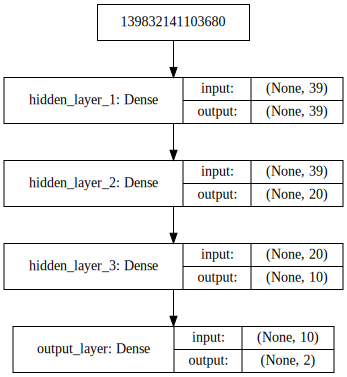

In [37]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

To check how well the model does out of the box, with it's randomly generated weights, we can call `evaluate`:

In [38]:
model.evaluate(X, y)

100/100 [==============================] - 0s 2ms/step


[25.17432779312134, 25.17432779312134, 1217.0933660888672]

The first number is the loss, the second is mean absolute error, the third the mean squared error.

### Start training the model

In [39]:
# this will help save training history more frequently
# https://keras.io/callbacks/#create-a-callback
class LossHistory(keras.callbacks.Callback):
    def __init__(self, frequency=100):
        self.frequency = frequency
    
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        if batch % self.frequency == 0:
            self.losses.append([batch, logs.get('loss'), logs.get('mean_absolute_error')])

In [41]:
gen = data_generator(ds, iselector=training_selector)
history = LossHistory()
steps_per_epoch = 5137262 // 100 # I wish there were a way to pre-know this
model.fit_generator(generator=gen, steps_per_epoch=steps_per_epoch, callbacks=[history])

Epoch 1/1
X.shape, y.shape: (5137262, 39), (5137262, 2)

*** Loaded new Batch ***

<xarray.Dataset>
Dimensions:      (nlat_input: 100, nlon_input: 100, sample: 864)
Coordinates:
  * sample       (sample) MultiIndex
  - input_batch  (sample) int64 0 1 2 3 4 5 6 7 8 ... 21 22 23 24 25 26 27 28 29
  - time         (sample) object 0046-02-01 00:00:00 ... 0046-02-01 00:00:00
Dimensions without coordinates: nlat_input, nlon_input
Data variables:
    X            (sample, nlon_input, nlat_input) float64 -0.01745 ... -0.01745
    Y            (sample, nlon_input, nlat_input) float64 -0.01745 ... -0.01745
    Z            (sample, nlon_input, nlat_input) float64 -0.9997 ... -0.9997
    U            (sample, nlon_input, nlat_input) float32 nan nan ... nan nan
    V            (sample, nlon_input, nlat_input) float32 nan nan ... nan nan
    TAUX         (sample, nlon_input, nlat_input) float32 nan nan ... nan nan
    TAUY         (sample, nlon_input, nlat_input) float32 nan nan ... nan nan
    SS

In [44]:
# now get a full set of inputs
testing_selector = {'time': [50, 51]}
full_gen = data_generator(ds, iselector=testing_selector, sub_batch_size=None)
X_test, y_test = next(iter(full_gen))


*** Loaded new Batch ***

<xarray.Dataset>
Dimensions:      (nlat_input: 100, nlon_input: 100, sample: 864)
Coordinates:
  * sample       (sample) MultiIndex
  - input_batch  (sample) int64 0 1 2 3 4 5 6 7 8 ... 21 22 23 24 25 26 27 28 29
  - time         (sample) object 0046-02-21 00:00:00 ... 0046-02-21 00:00:00
Dimensions without coordinates: nlat_input, nlon_input
Data variables:
    X            (sample, nlon_input, nlat_input) float64 -0.01745 ... -0.01745
    Y            (sample, nlon_input, nlat_input) float64 -0.01745 ... -0.01745
    Z            (sample, nlon_input, nlat_input) float64 -0.9997 ... -0.9997
    U            (sample, nlon_input, nlat_input) float32 nan nan ... nan nan
    V            (sample, nlon_input, nlat_input) float32 nan nan ... nan nan
    TAUX         (sample, nlon_input, nlat_input) float32 nan nan ... nan nan
    TAUY         (sample, nlon_input, nlat_input) float32 nan nan ... nan nan
    SST          (sample, nlon_input, nlat_input) float32 nan 

In [26]:
model.evaluate(X_test, y_test)

5137262/5137262 [==============================] - 104s 20us/step


[33.16365814471255, 3.622730020710279]

In [47]:
%time y_pred = model.predict(X_test)

CPU times: user 1min 54s, sys: 50.9 s, total: 2min 45s
Wall time: 1min 29s


<Figure size 432x288 with 0 Axes>

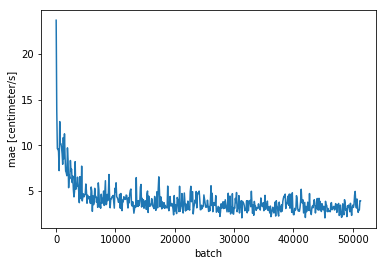

<Figure size 432x288 with 0 Axes>

In [45]:
batch, loss, mae = np.array(history.losses).transpose()
ds_hist = xr.Dataset({'loss': ('batch', loss),
                      'mae': ('batch', mae, {'units': ds.U.units})},
                     coords={'batch': ('batch', batch)})
ds_hist.mae.plot()
plt.figure()

In [73]:
kdims = ['true (cm/s)', 'predicted (cm/s)']

u_data = np.array([y_test[:, 0], y_pred[:, 0]]).transpose()
u_points = hv.Points(u_data, kdims=kdims, label="U")

v_data = np.array([y_test[:, 1], y_pred[:, 1]]).transpose()
v_points = hv.Points(v_data, kdims=kdims, label="V")

line_1x1 = hv.Path(np.array([[-200, -200], [200, 200]]), kdims=kdims).opts(color='red', line_width=2)

(datashade(u_points, cmap=plt.cm.binary) * line_1x1 +
 datashade(v_points, cmap=plt.cm.binary) * line_1x1 
).opts(opts.RGB(width=500, height=500, show_grid=True))

NameError: name 'y_test' is not defined